<a href="https://colab.research.google.com/github/gouravgujariya/car-price-prediction-machine-learning-project/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car price prediction 
##IBM assignment 
###linear regression model

Importing the Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn import metrics

Data Collection and Processing

In [7]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/car data.csv')

In [8]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##describing the data:
The data set I have selected is car price prediction dataset which is present in kaggle datasets.<br>
This data is used properly be helpfull for the prediction of the car price based on the attributes so the dealer of car could have a accurate value in mind before prediction of his car's price

##explaining attributes
<list>
1. car_name:car's name<br>
2. Year:Car's manufacturing year<br>
3. Selling_price:the price seller is asking<br>
4. present_price:present price of car<br>
5. Kms_Driven:no of km the has been drawen<br>
6. Fuel_type:what type of fuel is used in car<br>
7. Seller_type:type of seller<br>
8. Transmission:what tranmission is present in car manual of automatic<br>
9. Owner:no of owner of car 

#main objectives of this analysis are:<br>
<list> 
1. To get a predicted value of car's price
2. get clearity of car's price
3. before buying a second hand car we could have a perfect idea about its price
4. get practise on linear regression


In [9]:
# checking the number of rows and columns
df.shape

(301, 9)

In [10]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

so as we could see there are no null values present in the data set

Now lets deal with the categorical data

In [12]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Here we are creating lambda functions to Encoding the Categorical Data into numerical values such task help us to find the relation btw target variable and is neccesary for model creating

In [17]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


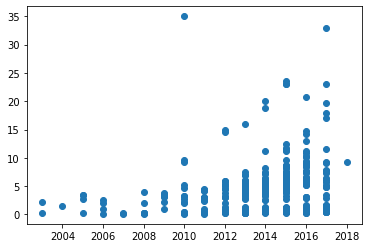

In [46]:
plt.scatter(df['Year'],df['Selling_Price'])
# plt.show()

This graph show how the new cars are sold at higher price then old cars

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Kms_Driven']=ss.fit_transform(df[['Kms_Driven']].values)

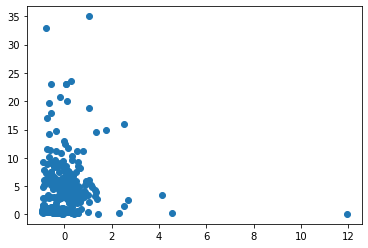

In [51]:
plt.scatter(df.Kms_Driven,df.Selling_Price)

Here we are able to see that less driven car are sold at more prices but we could see some of the outliers

In [53]:
df['Car_Name'].unique().sum()

'ritzsx4ciazwagon rswiftvitara brezzas crossalto 800ertigadzirealto k10ignis800balenoomnifortunerinnovacorolla altisetios crossetios getios livacorollaetios gdcamryland cruiserRoyal Enfield Thunder 500UM Renegade MojaveKTM RC200Bajaj Dominar 400Royal Enfield Classic 350KTM RC390Hyosung GT250RRoyal Enfield Thunder 350KTM 390 Duke Mahindra Mojo XT300Bajaj Pulsar RS200Royal Enfield Bullet 350Royal Enfield Classic 500Bajaj Avenger 220Bajaj Avenger 150Honda CB Hornet 160RYamaha FZ S V 2.0Yamaha FZ 16TVS Apache RTR 160Bajaj Pulsar 150Honda CBR 150Hero ExtremeBajaj Avenger 220 dtsiBajaj Avenger 150 streetYamaha FZ  v 2.0Bajaj Pulsar  NS 200Bajaj Pulsar 220 FTVS Apache RTR 180Hero Passion X proBajaj Pulsar NS 200Yamaha Fazer Honda Activa 4GTVS Sport Honda Dream Yuga Bajaj Avenger Street 220Hero Splender iSmartActiva 3gHero Passion ProHonda CB TriggerYamaha FZ S Bajaj Pulsar 135 LSActiva 4gHonda CB UnicornHero Honda CBZ extremeHonda KarizmaHonda Activa 125TVS JupyterHero Honda Passion ProHero S

Splitting the data and Target

In [54]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [20]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [21]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)


Model Training

1. Linear Regression

In [56]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [57]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [58]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [59]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.87994516604937


Visualize the actual prices and Predicted prices

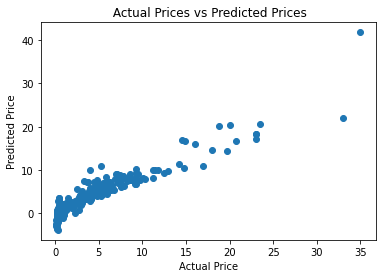

In [60]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [61]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [62]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715025056


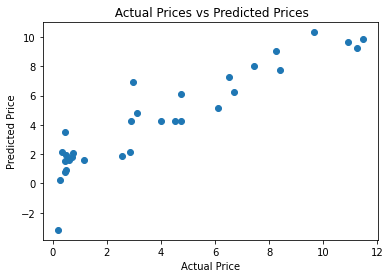

In [63]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [64]:
# loading the linear regression model
lass_reg_model = Lasso()

In [65]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [66]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [67]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8440304847252585


Visualize the actual prices and Predicted prices

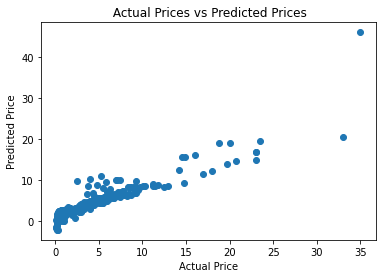

In [68]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [69]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [70]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8744278429442974


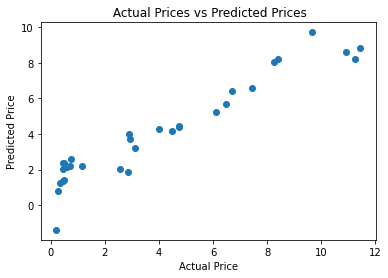

In [71]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [72]:
red=Ridge()

In [75]:
red.fit(X_train,Y_train)


Ridge()

In [76]:
redpri=red.predict(X_test)

In [77]:
red.score(X_test,redpri)

1.0

In [82]:
elasnetreg=ElasticNet()

In [83]:
elasnetreg.fit(X_train,Y_train)
elasnetpri=elasnetreg.predict(X_test)

In [84]:
elasnetreg.score(X_test,elasnetpri)

1.0

In [85]:
elasnetpri

array([ 9.64527813,  1.36872313,  4.38440734,  3.13978509,  8.88939917,
        4.20145379,  3.61011317,  5.74869671,  0.76369095,  5.29131286,
        6.45510066,  4.48096615,  1.21321262,  8.28463607,  1.927957  ,
        2.27996337,  2.66341848,  2.48554698,  8.28463607,  4.32064268,
        2.16863667,  8.06380633,  2.07159961,  8.70874753,  1.39616616,
        6.64821829,  2.20373273, -1.63868057,  4.04851427,  1.7856598 ,
        2.48046494])

With the final score of 1 we could say that by using rigde regression we could create a model that could predict the accurate pricing of cars based on the attributes

the report highlight possible flaws in the model such as outliers or the less attributes to deside for the predict making more accurate a plan of action to revisit this analysis is to make a basic pridiction for car price prediction with additional data  and different predictive modeling techniques like logistic regrrsion so we could see the polynomial relation between dataset also